In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, log_loss
from sklearn import metrics

In [2]:
spotify_df = pd.read_csv('spotifytracks.csv')

In [3]:
spotify_df.drop(['genre', 'Unnamed: 0'], axis=1, inplace=True)

In [4]:
spotify_df

track_name          album               artist release_date  \
0           One More Year  The Slow Rush          Tame Impala   2020-02-14   
1        Vámonos de Viaje           BACH      Bandalos Chinos   2018-08-03   
2                   Sofia       Immunity               Clairo   2019-08-02   
3            Sadnecessary   Sadnecessary         Milky Chance   2013-05-31   
4              Closedloop   Boomerang EP          Elliot Moss   2017-04-28   
...                   ...            ...                  ...          ...   
10135  The Theme - Take 1        Workin'  Miles Davis Quintet         1959   
10136       Trane's Blues        Workin'  Miles Davis Quintet         1959   
10137       Ahmad's Blues        Workin'  Miles Davis Quintet         1959   
10138         Half Nelson        Workin'  Miles Davis Quintet         1959   
10139  The Theme - Take 2        Workin'  Miles Davis Quintet         1959   

       length  popularity  danceability  energy  key  loudness  mode  \
0      324013          59         0.602   0.880    1    -5.414     1   
1      235866           2         0.766   0.749    5    -6.147     1   
2      188386          83         0.744   0.619    0    -9.805     1   
3      298000          51         0.757   0.542    9   -10.674     1   
4      280689          37         0.803   0.420    7   -10.220     0   
...       ...         ...           ...     ...  ...       ...   ...   
10135  118146          33         0.473   0.427   10   -10.742     0   
10136  512146          37         0.554   0.445    0   -10.211     0   
10137  444226          34         0.554   0.412    6   -14.048     1   
10138  285040          29         0.521   0.726    0    -7.266     1   
10139   64280          27         0.482   0.806   11    -8.566     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.0354        0.0570          0.460000    0.2840    0.493   
1           0.0303        0.0249          0.002150    0.3550    0.889   
2           0.0390        0.5980          0.003720    0.2310    0.641   
3           0.0775        0.7960          0.019600    0.2650    0.466   
4           0.0432        0.2560          0.112000    0.0703    0.493   
...            ...           ...               ...       ...      ...   
10135       0.0406        0.5210          0.001340    0.5530    0.444   
10136       0.0385        0.6740          0.000011    0.0926    0.498   
10137       0.0495        0.5040          0.534000    0.1660    0.457   
10138       0.1210        0.7390          0.000877    0.1460    0.712   
10139       0.0414        0.8050          0.011900    0.1280    0.361   

         tempo  time_signature  target  
0      114.009               4       1  
1      129.010               4       1  
2      112.997               4       1  
3      107.988               4       1  
4      130.031               4       1  
...        ...             ...     ...  
10135  137.139               4       0  
10136   80.505               4       0  
10137  116.631               4       0  
10138  128.432               4       0  
10139  104.978               4       0  

[10140 rows x 19 columns]

## Visualizing Features/Genres

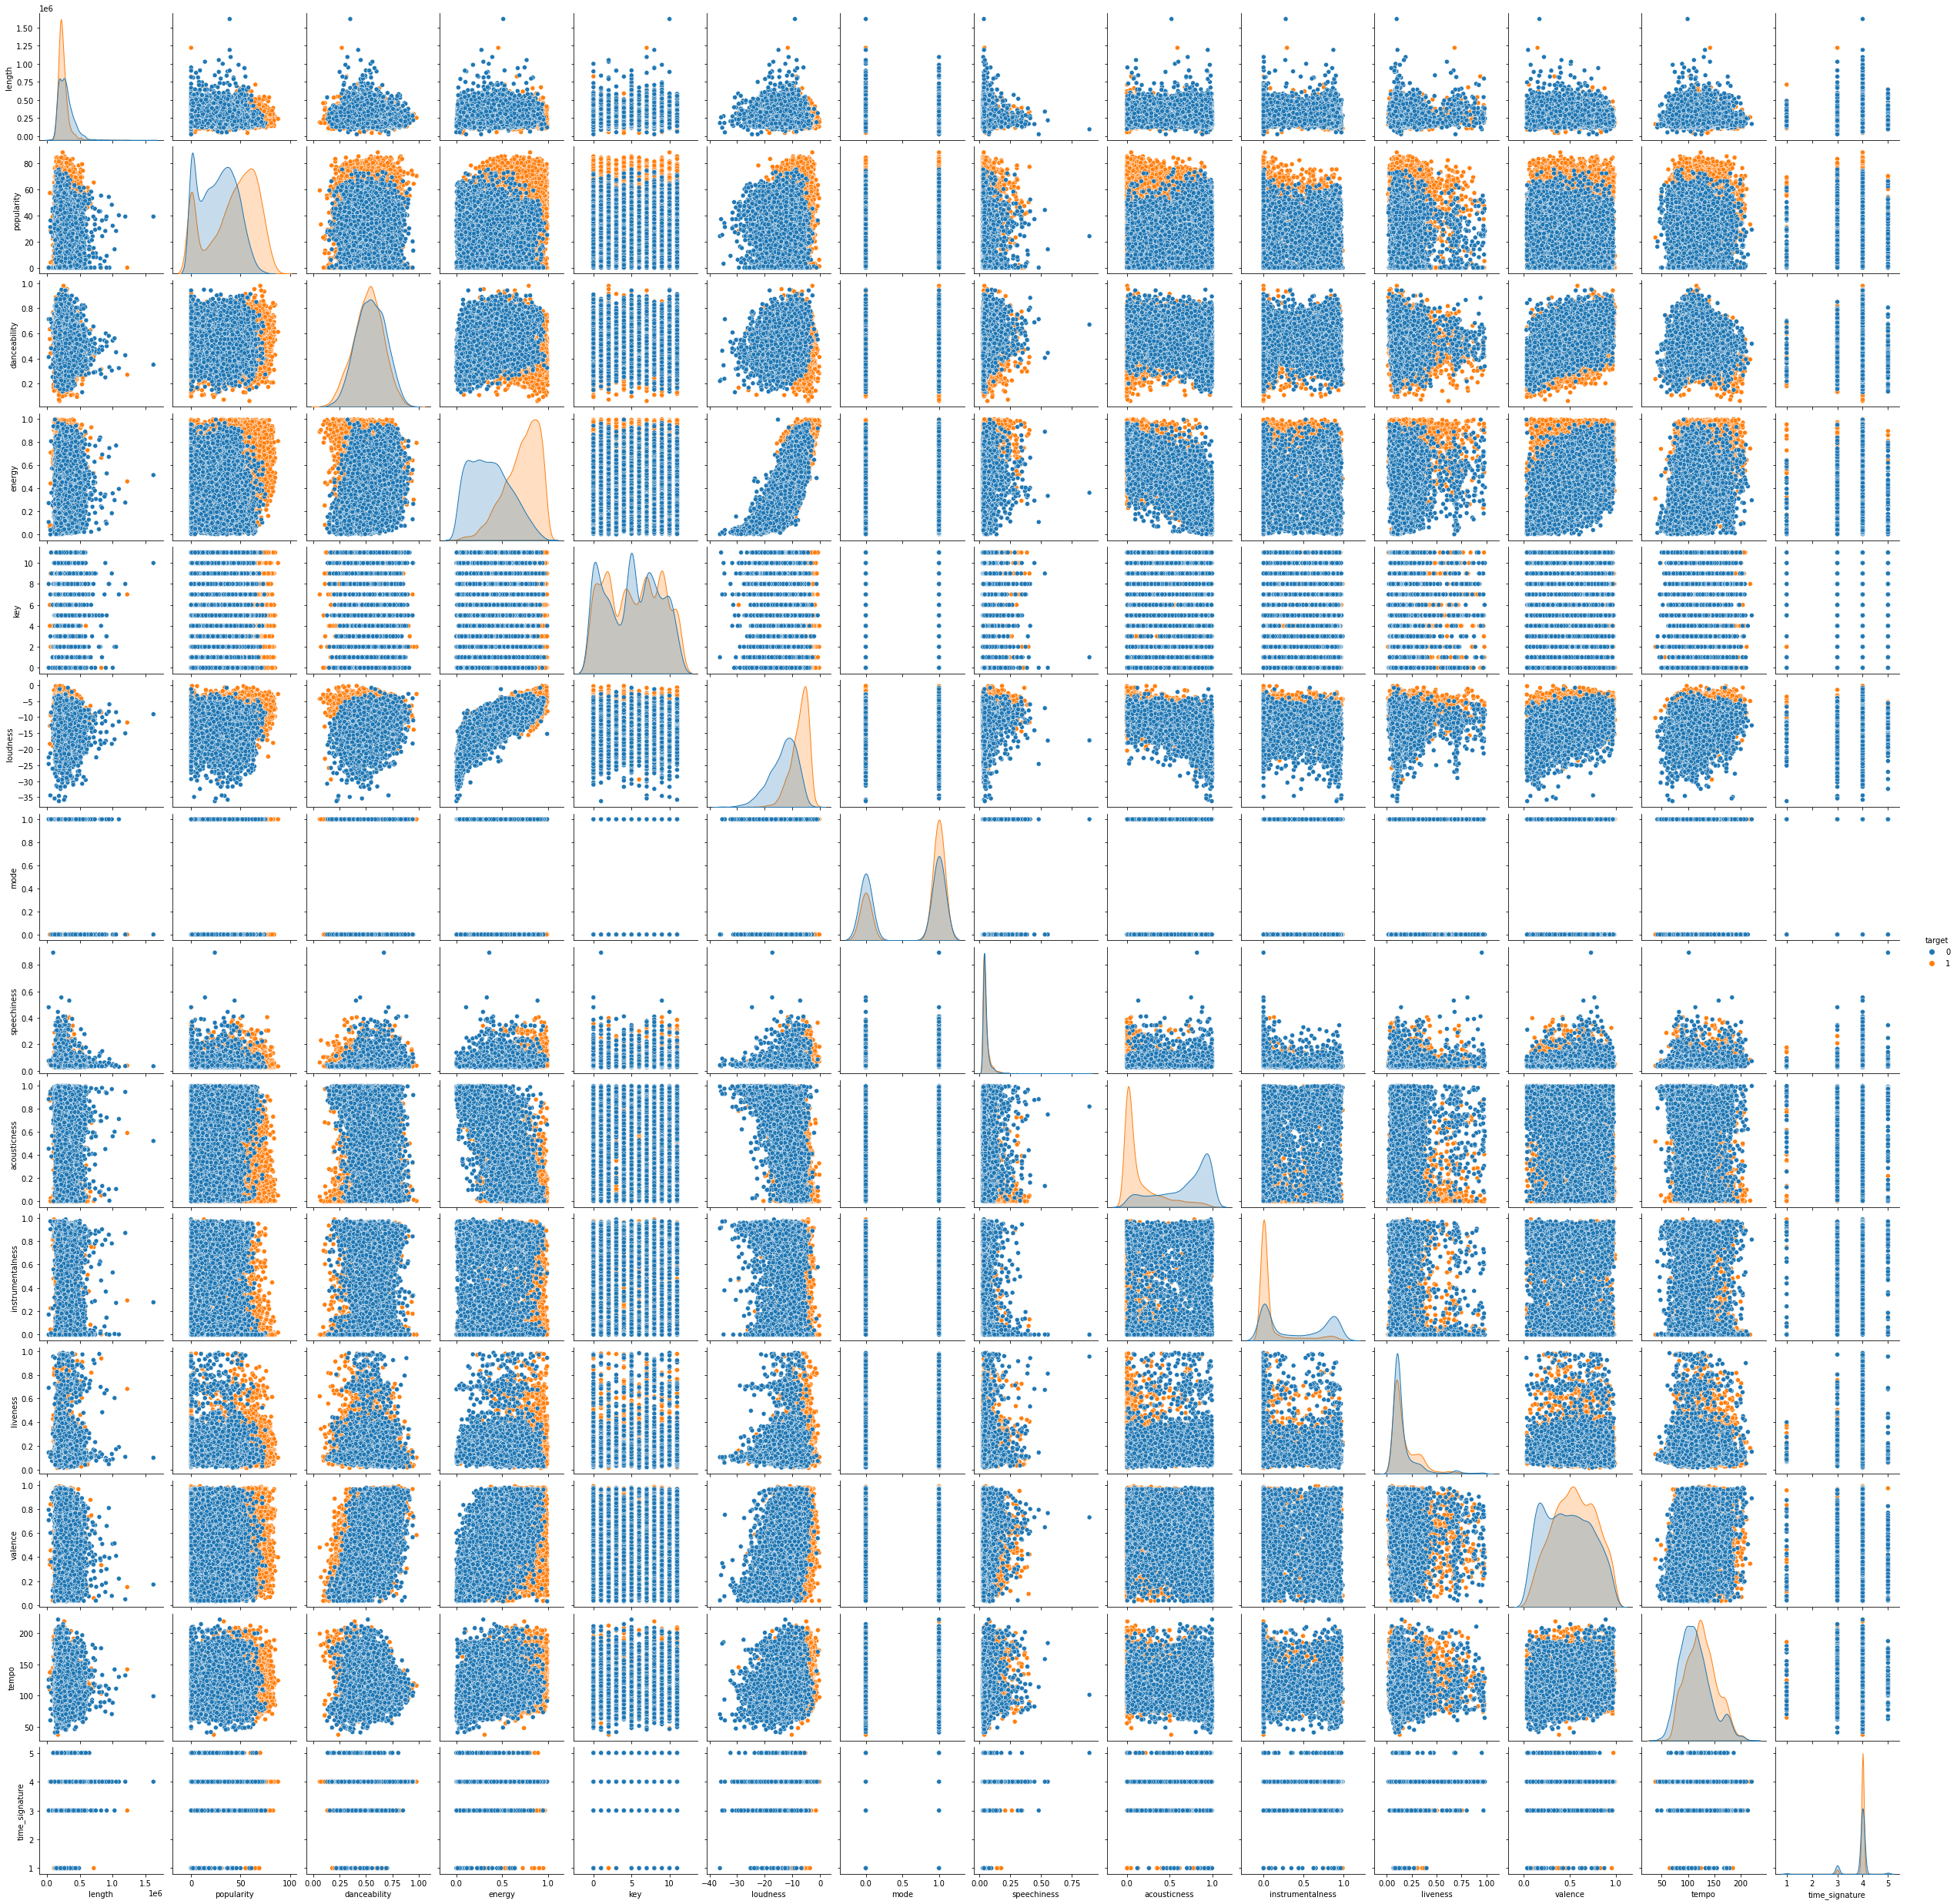

In [10]:
sns.pairplot(spotify_df, hue='target')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

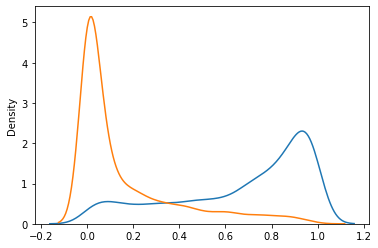

In [59]:
target_0 = spotify_df.loc[spotify_df['target'] == 0]
target_1 = spotify_df.loc[spotify_df['target'] == 1]
 
sns.distplot(target_0[['acousticness']], hist=False)
sns.distplot(target_1[['acousticness']], hist=False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

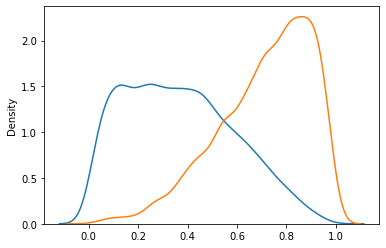

In [60]:
sns.distplot(target_0[['energy']], hist=False)
sns.distplot(target_1[['energy']], hist=False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

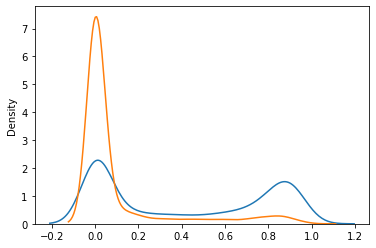

In [62]:
sns.distplot(target_0[['instrumentalness']], hist=False)
sns.distplot(target_1[['instrumentalness']], hist=False)

## Train/Val/Test Split

In [5]:
X = np.array(spotify_df.iloc[:, 4:-1])
y = np.array(spotify_df.target)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)

(6489, 14)
(2028, 14)


In [9]:
print(X_val.shape)
print(X_val.shape)

(1623, 14)
(1623, 14)


In [10]:
print(y_train.shape)
print(y_test.shape)

(6489,)
(2028,)


## KNN with scaling, simple train-val-test

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=39, weights='distance')
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_val_pred = knn.predict(X_val_scaled)

In [12]:
accuracy = metrics.accuracy_score(y_train, y_train_pred)
precision = metrics.precision_score(y_train, y_train_pred)
recall = metrics.recall_score(y_train, y_train_pred)
f1 = metrics.f1_score(y_train, y_train_pred)

print("Training Set Accuracy:" , round(accuracy, 3))
print("Training Set Precision:", round(precision, 3))
print("Training Set Recall:", round(recall, 3))
print("Training Set F1 Score:", round(f1, 3))

Training Set Accuracy: 1.0
Training Set Precision: 1.0
Training Set Recall: 1.0
Training Set F1 Score: 1.0


In [13]:
accuracy = metrics.accuracy_score(y_val, y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred)
recall = metrics.recall_score(y_val, y_val_pred)
f1 = metrics.f1_score(y_val, y_val_pred)

print("Val Set Accuracy:" , round(accuracy, 3))
print("Val Set Precision:", round(precision, 3))
print("Val Set Recall:", round(recall, 3))
print("Val Set F1 Score:", round(f1, 3))

Val Set Accuracy: 0.904
Val Set Precision: 0.913
Val Set Recall: 0.897
Val Set F1 Score: 0.905


## KNN with scaling, 10Fold CV

In [14]:
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=39, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=39, weights='distance')

In [15]:
training_accuracy_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
training_f1_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='f1')

print("Training Set Accuracy Scores:", training_accuracy_scores)
print("Training Set Accuracy Mean:", training_accuracy_scores.mean(), '\n')

print("Training Set F1 Scores:", training_f1_scores)
print("Training Set F1 Mean:", training_f1_scores.mean())

Training Set Accuracy Scores: [0.87827427 0.90600924 0.89522342 0.90600924 0.91679507 0.88597843
 0.90446841 0.90909091 0.89676425 0.9058642 ]
Training Set Accuracy Mean: 0.9004477448686489 

Training Set F1 Scores: [0.87901991 0.906298   0.89728097 0.90483619 0.915625   0.88615385
 0.90432099 0.90824261 0.89676425 0.90483619]
Training Set F1 Mean: 0.9003377964108775


In [16]:
val_accuracy_scores = cross_val_score(knn, X_val_scaled, y_val, cv=10, scoring='accuracy')
val_f1_scores = cross_val_score(knn, X_val_scaled, y_val, cv=10, scoring='f1')

print("Val Set Accuracy Scores:", val_accuracy_scores)
print("Val Set Accuracy Mean:", val_accuracy_scores.mean(), '\n')

print("Val Set F1 Scores:", val_f1_scores)
print("Val Set F1 Mean:", val_f1_scores.mean())

Val Set Accuracy Scores: [0.90184049 0.88343558 0.9202454  0.87037037 0.86419753 0.90740741
 0.91358025 0.89506173 0.83950617 0.92592593]
Val Set Accuracy Mean: 0.8921570855108687 

Val Set F1 Scores: [0.90361446 0.88757396 0.92121212 0.87272727 0.86746988 0.9132948
 0.91764706 0.89570552 0.84146341 0.92857143]
Val Set F1 Mean: 0.8949279916975191


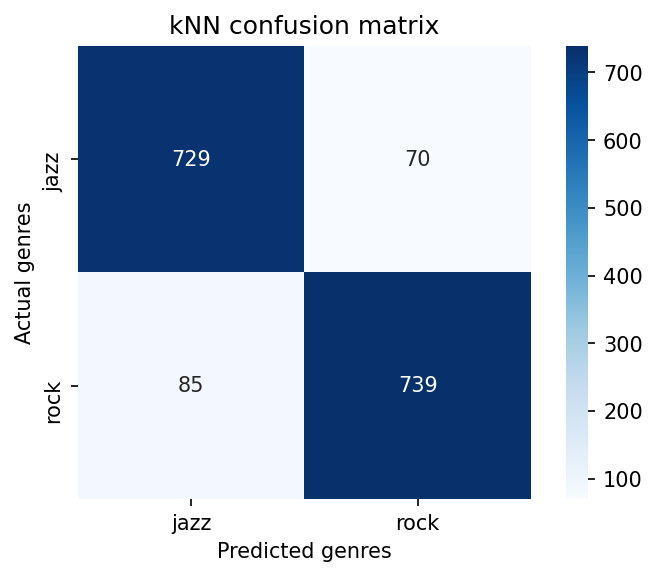

In [17]:
knn_confusion = confusion_matrix(y_val, knn.predict(X_val_scaled))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['jazz', 'rock'],
           yticklabels=['jazz', 'rock']);

plt.xlabel('Predicted genres')
plt.ylabel('Actual genres')
plt.title('kNN confusion matrix');

In [18]:
fpr, tpr, thresholds = roc_curve(y_val, knn.predict_proba(X_val_scaled)[:,1])

ROC AUC score =  0.9654597069151974


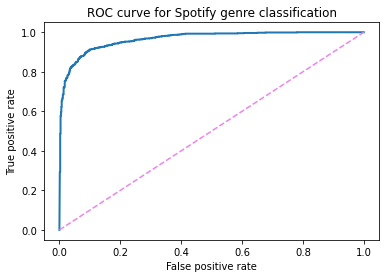

In [19]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Spotify genre classification');
print("ROC AUC score = ", roc_auc_score(y_val, knn.predict_proba(X_val_scaled)[:,1]))

In [20]:
print("Log-loss on random forest: {:6.4f}".format(log_loss(y_val, knn.predict_proba(X_val_scaled))))

Log-loss on random forest: 0.2617


### Finding best parameter using GridSearch CV

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
k_range = list(range(1, 50))
weight_options = ['uniform', 'distance']

In [84]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance']}


In [85]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(n_neighbors=29, weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [86]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 39, 'weights': 'distance'}
Best estimator:  KNeighborsClassifier(n_neighbors=39, weights='distance')
Best score:  0.614102564102564
